In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\sean812\Desktop\Internship\checklist\valuations_project_datacleaned.csv", encoding='latin -1')

In [3]:
data.head()

,Unnamed: 0,listing_price,property_type_id,city,latitude,longitude,floor_area_sqm,bedrooms,bathrooms,car_spaces,count
0,0,74000000.0,2.0,Makati,14.559030,121.028470,309.0,3.0,3.0,3.0,26.0
1,1,7500000.0,1.0,Makati,14.558375,121.022123,41.0,1.0,1.0,0.0,10.0
2,2,19500000.0,2.0,Makati,14.556770,121.015400,162.0,3.0,3.0,1.0,3.0
3,3,65000000.0,2.0,Makati,14.566514,121.039021,193.0,3.0,3.0,2.0,16.0
4,4,15500000.0,2.0,Makati,14.556770,121.015400,156.0,2.0,3.0,1.0,15.0


In [4]:
data.describe()

,Unnamed: 0,listing_price,property_type_id,latitude,longitude,floor_area_sqm,bedrooms,bathrooms,car_spaces,count
count,10916.000000,1.091600e+04,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000,10916.000000
mean,612.236900,4.490305e+07,2.497069,14.528970,121.008368,245.669175,3.139428,3.001741,5.770795,7.429919
std,445.271396,1.370464e+08,0.716976,0.206541,2.581229,298.448659,3.065326,3.113798,43.770932,10.996786
min,0.000000,0.000000e+00,1.000000,1.000000,-88.940620,1.000000,0.000000,1.000000,0.000000,0.000000
25%,242.000000,5.900000e+06,2.000000,14.481893,121.023680,77.000000,2.000000,2.000000,1.000000,0.000000
50%,522.000000,1.150000e+07,3.000000,14.546100,121.030100,150.000000,3.000000,3.000000,2.000000,3.000000
75%,908.000000,2.300000e+07,3.000000,14.570229,121.055300,330.000000,4.000000,4.000000,2.000000,10.000000
max,1780.000000,7.900000e+09,3.000000,16.366670,121.833390,9216.570000,268.000000,268.000000,2000.000000,84.000000


In [5]:
#We check there are no missing values and no object data types
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10916 entries, 0 to 10915
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10916 non-null  int64  
 1   listing_price     10916 non-null  float64
 2   property_type_id  10916 non-null  float64
 3   city              10916 non-null  object 
 4   latitude          10916 non-null  float64
 5   longitude         10916 non-null  float64
 6   floor_area_sqm    10916 non-null  float64
 7   bedrooms          10916 non-null  float64
 8   bathrooms         10916 non-null  float64
 9   car_spaces        10916 non-null  float64
 10  count             10916 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 938.2+ KB


Unnamed: 0          0
listing_price       0
property_type_id    0
city                0
latitude            0
longitude           0
floor_area_sqm      0
bedrooms            0
bathrooms           0
car_spaces          0
count               0
dtype: int64

<AxesSubplot:>

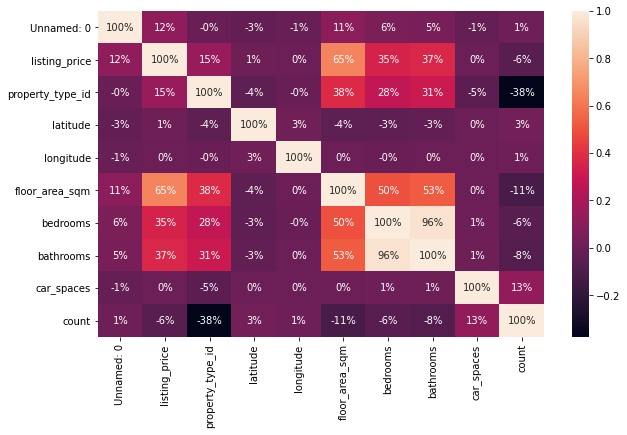

In [6]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

listing_price       1.000000
floor_area_sqm      0.648277
bathrooms           0.369815
bedrooms            0.352648
property_type_id    0.150074
Unnamed: 0          0.120713
latitude            0.008957
car_spaces          0.003096
longitude           0.001567
count              -0.057012
Name: listing_price, dtype: float64


<AxesSubplot:>

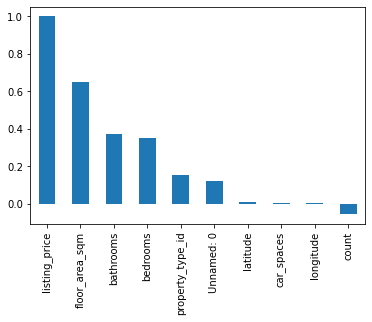

In [7]:
#Calculate and order correlations
correlations = data.corr()['listing_price'].sort_values(ascending=False)
print(correlations)
correlations.plot(kind='bar')

In [8]:
print(abs(correlations) > 0.2)


listing_price        True
floor_area_sqm       True
bathrooms            True
bedrooms             True
property_type_id    False
Unnamed: 0          False
latitude            False
car_spaces          False
longitude           False
count               False
Name: listing_price, dtype: bool


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

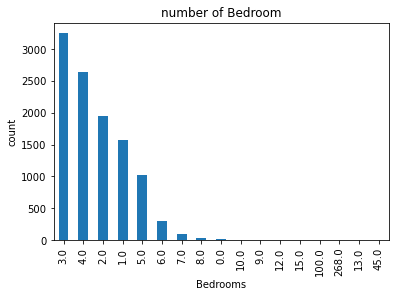

In [9]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('count')
sns.despine

<Figure size 720x720 with 0 Axes>

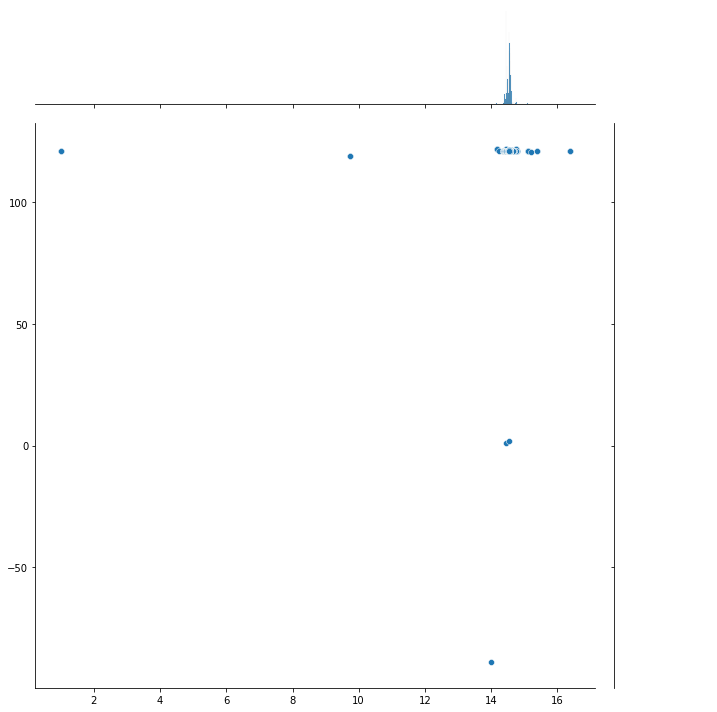

In [29]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, height=10)
plt.ylabel('longitude', fontsize = 12)
plt.xlabel ('latitude', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Price vs Square Feet')

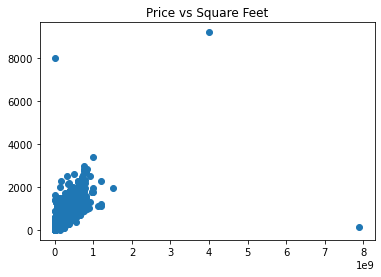

In [11]:
plt.scatter(data.listing_price,data.floor_area_sqm)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs longitude ')

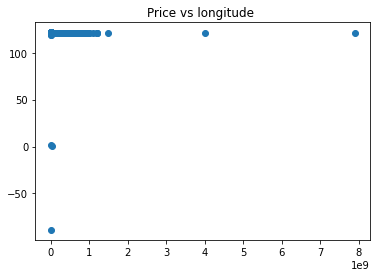

In [12]:
plt.scatter(data.listing_price,data.longitude)
plt.title("Price vs longitude ")

Text(0.5, 1.0, 'Latitude vs Price')

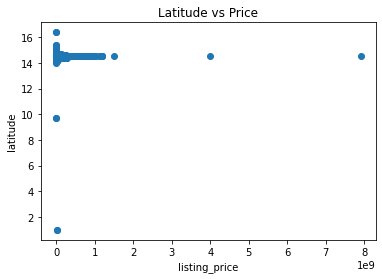

In [13]:
plt.scatter(data.listing_price,data.latitude)
plt.xlabel("listing_price")
plt.ylabel('latitude')
plt.title("Latitude vs Price")

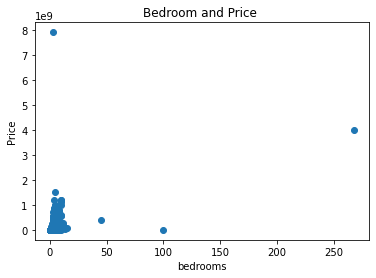

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [14]:
plt.scatter(data.bedrooms,data.listing_price)
plt.title("Bedroom and Price ")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

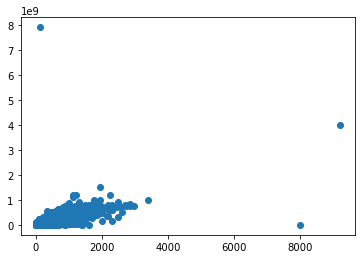

In [15]:
plt.scatter((data['floor_area_sqm']),data['listing_price'])

In [16]:
train1 = data.drop(['city', 'listing_price'],axis=1)
labels = data['listing_price']

In [17]:
from sklearn.linear_model import LinearRegression


In [18]:
reg = LinearRegression()


In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20,random_state =0)


In [38]:
reg.fit(x_train,y_train)


LinearRegression()

In [39]:
#predicted score
reg.score(x_test,y_test)

0.6433674394685056

In [40]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [41]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [42]:
#predicted score with gboost
clf.score(x_test,y_test)

0.9079168916528655